## Résolution du problème du taximan avec le Hill Climbing

Le projet ci dessus résous une variante du TSP (probleme du voyageur de commerce)

Ici nous avons un conducteur de taxis qui doit passer par plusieurs villes depuis une origine jusqu'à une destination. On veut ici minimiser la distance du trajet et par extension optimiser ses dépenses en carburant.

Nous avons générer aléatoirement des clusters représentant les villes ainsi qu'une origine et une destination

Nous avons utilisé l'algorithme de Hill Climbing pour résoudre ce probleme. 

Dans un premier temps le Hill Climbing simplement puis en faisant boucler cet algorithme un certain nombre de fois avec une solution initiale aléatoire et ressortir le meilleur résultat

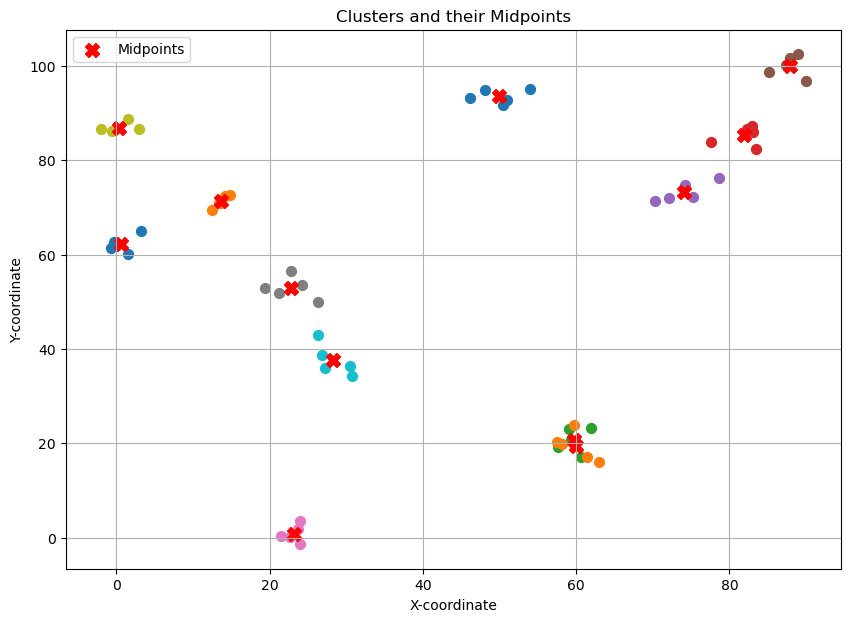

[array([49.90857739, 93.52832854]),
 array([13.73177709, 71.26228089]),
 array([59.70550881, 20.6712752 ]),
 array([81.9111506 , 85.25136415]),
 array([74.09790534, 73.26748555]),
 array([87.88409644, 99.95653449]),
 array([23.12891573,  0.86450479]),
 array([22.79903803, 52.958556  ]),
 array([ 0.35556454, 86.91285856]),
 array([28.31899321, 37.71392626]),
 array([ 0.68529355, 62.22548812]),
 array([59.9342722 , 19.47707016])]

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Génération de 12 clusters aléatoires
num_clusters = 12
cluster_size = 5
cluster_std_dev = 2

np.random.seed(42)  # Seed pour la reproductibilité

# Générer des centres de clusters aléatoires
cluster_centers = np.random.randint(0, 100, size=(num_clusters, 2))

# Générer des points autour des centres de clusters
clusters = []
for center in cluster_centers:
    # Utiliser une distribution normale pour générer des points autour du centre
    cluster = center + np.random.randn(cluster_size, 2) * cluster_std_dev
    clusters.append(cluster)

# Calculer les coordonnées du milieu de chaque cluster
midpoints = [cluster.mean(axis=0) for cluster in clusters]

# Afficher les clusters et leurs milieux
plt.figure(figsize=(10, 7))
for cluster in clusters:
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50)
    
plt.scatter(*zip(*midpoints), c='red', s=100, marker='X', label='Midpoints')
plt.title("Clusters and their Midpoints")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()
plt.grid(True)
plt.show()

midpoints


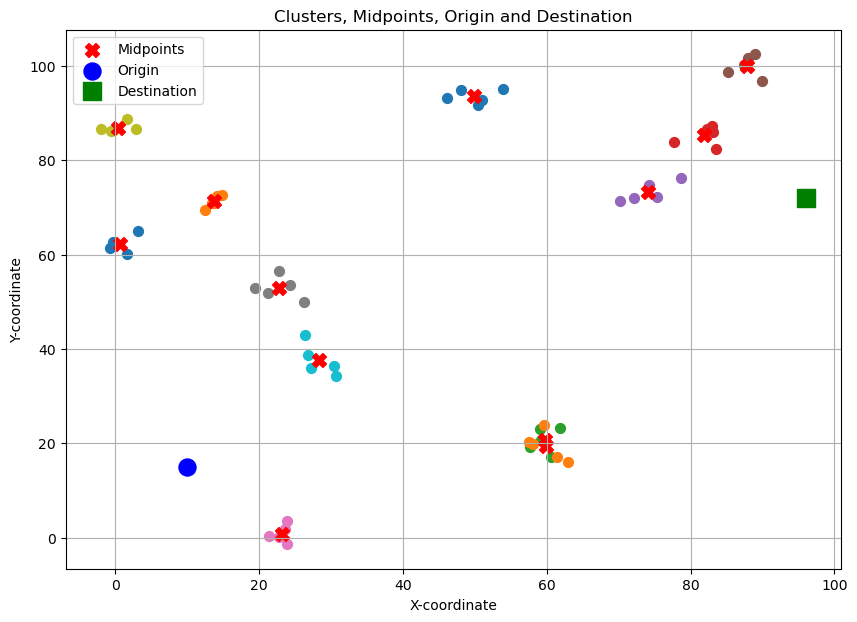

(array([10, 15]), array([96, 72]))

In [24]:
# Générer aléatoirement un point d'origine et un point de destination
origin = np.random.randint(0, 100, size=2)
destination = np.random.randint(0, 100, size=2)

# Afficher les clusters, leurs milieux, l'origine et la destination
plt.figure(figsize=(10, 7))
for cluster in clusters:
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50)
    
plt.scatter(*zip(*midpoints), c='red', s=100, marker='X', label='Midpoints')
plt.scatter(*origin, c='blue', s=150, marker='o', label='Origin')
plt.scatter(*destination, c='green', s=150, marker='s', label='Destination')
plt.title("Clusters, Midpoints, Origin and Destination")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()
plt.grid(True)
plt.show()

origin, destination


In [29]:
def hill_climbing(midpoints, origin, destination, max_iterations=10000):
    """Algorithme de Hill Climbing pour résoudre le probleme."""
    current_solution = midpoints.copy()
    current_distance = total_path_distance(current_solution, origin, destination)
    best_solution = current_solution
    best_distance = current_distance
    
    no_improvement_iterations = 0  # Compteur pour les itérations consécutives sans amélioration
    
    for iteration in range(max_iterations):
        improved = False
        for i in range(len(current_solution) - 1):
            for j in range(i+1, len(current_solution)):
                # Inverse 2 villes et vérifie si le résultat obtenu est meilleur
                swapped_solution = current_solution.copy()
                swapped_solution[i], swapped_solution[j] = swapped_solution[j], swapped_solution[i]
                swapped_distance = total_path_distance(swapped_solution, origin, destination)
                if swapped_distance < current_distance:
                    current_solution = swapped_solution
                    current_distance = swapped_distance
                    improved = True
        # Si aucune amélioration n'est trouvée, incrémenter le compteur
        if not improved:
            no_improvement_iterations += 1
        else:  # Réinitialiser le compteur si une amélioration est trouvée
            no_improvement_iterations = 0
        
        # Sortir de la boucle si le compteur atteint 10
        if no_improvement_iterations >= 10:
            break
        
        # Mise à jour si une meilleure solution est trouvée
        if current_distance < best_distance:
            best_solution = current_solution
            best_distance = current_distance
            
    return best_solution, best_distance


# Application du Hill Climbing
best_path, best_distance = hill_climbing(midpoints, origin, destination)

best_path, best_distance


([array([23.12891573,  0.86450479]),
  array([74.09790534, 73.26748555]),
  array([81.9111506 , 85.25136415]),
  array([59.70550881, 20.6712752 ]),
  array([59.9342722 , 19.47707016]),
  array([28.31899321, 37.71392626]),
  array([22.79903803, 52.958556  ]),
  array([ 0.68529355, 62.22548812]),
  array([13.73177709, 71.26228089]),
  array([ 0.35556454, 86.91285856]),
  array([49.90857739, 93.52832854]),
  array([87.88409644, 99.95653449])],
 422.4147914885399)

**Après utilisation de l'algorithme nous avons le parcours avec les coordonnées des points et la distance totale parcourue qui est 422.14**

Il faut noter que l'algorithme itère 10 000 fois mais s'arrête lorsqu'une nouvelle distance trouvée n'est pas meilleure que la précédente au bout de 10 itérations

On affiche le parcours comme suit:

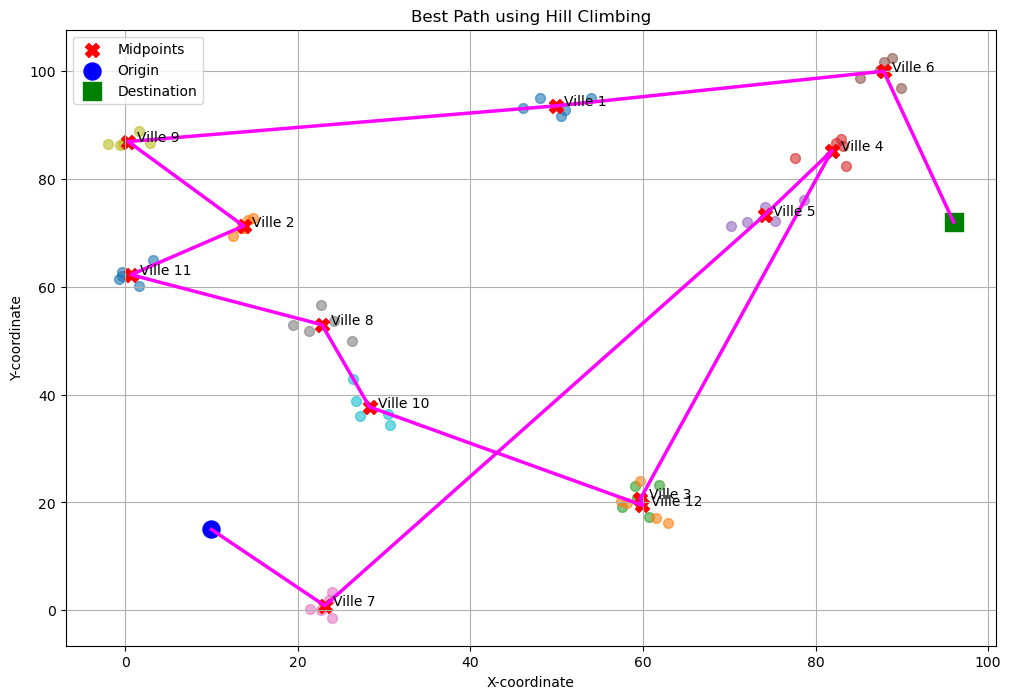

In [30]:
# Afficher les clusters, leurs milieux, l'origine, la destination et le meilleur trajet
plt.figure(figsize=(12, 8))
for cluster in clusters:
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50, alpha=0.6)
    
# Tracer le trajet
path = [origin] + best_path + [destination]
plt.plot(*zip(*path), linestyle='-', color='magenta', linewidth=2.5)

# Annoter les villes
for idx, point in enumerate(midpoints, 1):
    plt.annotate(f"Ville {idx}", (point[0] + 1, point[1]), fontsize=10)

# Marquer les midpoints, origin et destination
plt.scatter(*zip(*midpoints), c='red', s=100, marker='X', label='Midpoints')
plt.scatter(*origin, c='blue', s=150, marker='o', label='Origin')
plt.scatter(*destination, c='green', s=150, marker='s', label='Destination')
plt.title("Best Path using Hill Climbing")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()
plt.grid(True)
plt.show()


**Le résultat n'est pas optimal donc on va modifier notre algorithme pour le rendre un peu plus performant**

Pour ce faire on va faire boucler notre algorithme 5 fois et à chaque execution on fourni une solution initiale aléatoire 

In [31]:
import random

def hill_climbing_with_random_start(midpoints, origin, destination, num_iterations=10000, num_trials=5):
    """Algorithme de Hill Climbing qui boucle plusieurs fois avec une solution initiale aléatoire à chaque fois."""
    results = []
    
    for trial in range(num_trials):
        # Randomize the order of the cities for the initial solution
        random_start = midpoints.copy()
        random.shuffle(random_start)
        best_path, best_distance = hill_climbing(random_start, origin, destination, max_iterations=num_iterations)
        results.append((best_path, best_distance))
    
    return results

# Apply hill climbing with random starts for 5 trials
results = hill_climbing_with_random_start(midpoints, origin, destination)

# Display the results of the 5 trials
results


[([array([23.12891573,  0.86450479]),
   array([22.79903803, 52.958556  ]),
   array([ 0.68529355, 62.22548812]),
   array([13.73177709, 71.26228089]),
   array([ 0.35556454, 86.91285856]),
   array([49.90857739, 93.52832854]),
   array([87.88409644, 99.95653449]),
   array([81.9111506 , 85.25136415]),
   array([74.09790534, 73.26748555]),
   array([28.31899321, 37.71392626]),
   array([59.9342722 , 19.47707016]),
   array([59.70550881, 20.6712752 ])],
  409.0506083620441),
 ([array([23.12891573,  0.86450479]),
   array([28.31899321, 37.71392626]),
   array([22.79903803, 52.958556  ]),
   array([87.88409644, 99.95653449]),
   array([81.9111506 , 85.25136415]),
   array([74.09790534, 73.26748555]),
   array([59.70550881, 20.6712752 ]),
   array([59.9342722 , 19.47707016]),
   array([ 0.68529355, 62.22548812]),
   array([13.73177709, 71.26228089]),
   array([ 0.35556454, 86.91285856]),
   array([49.90857739, 93.52832854])],
  449.3051014262171),
 ([array([23.12891573,  0.86450479]),
   a

**Nous avons un meilleur résultat ainsi. On a 5 résultats et la plus petite distance est 314.74**

On affiche les 5 parcours obtenus comme suit:

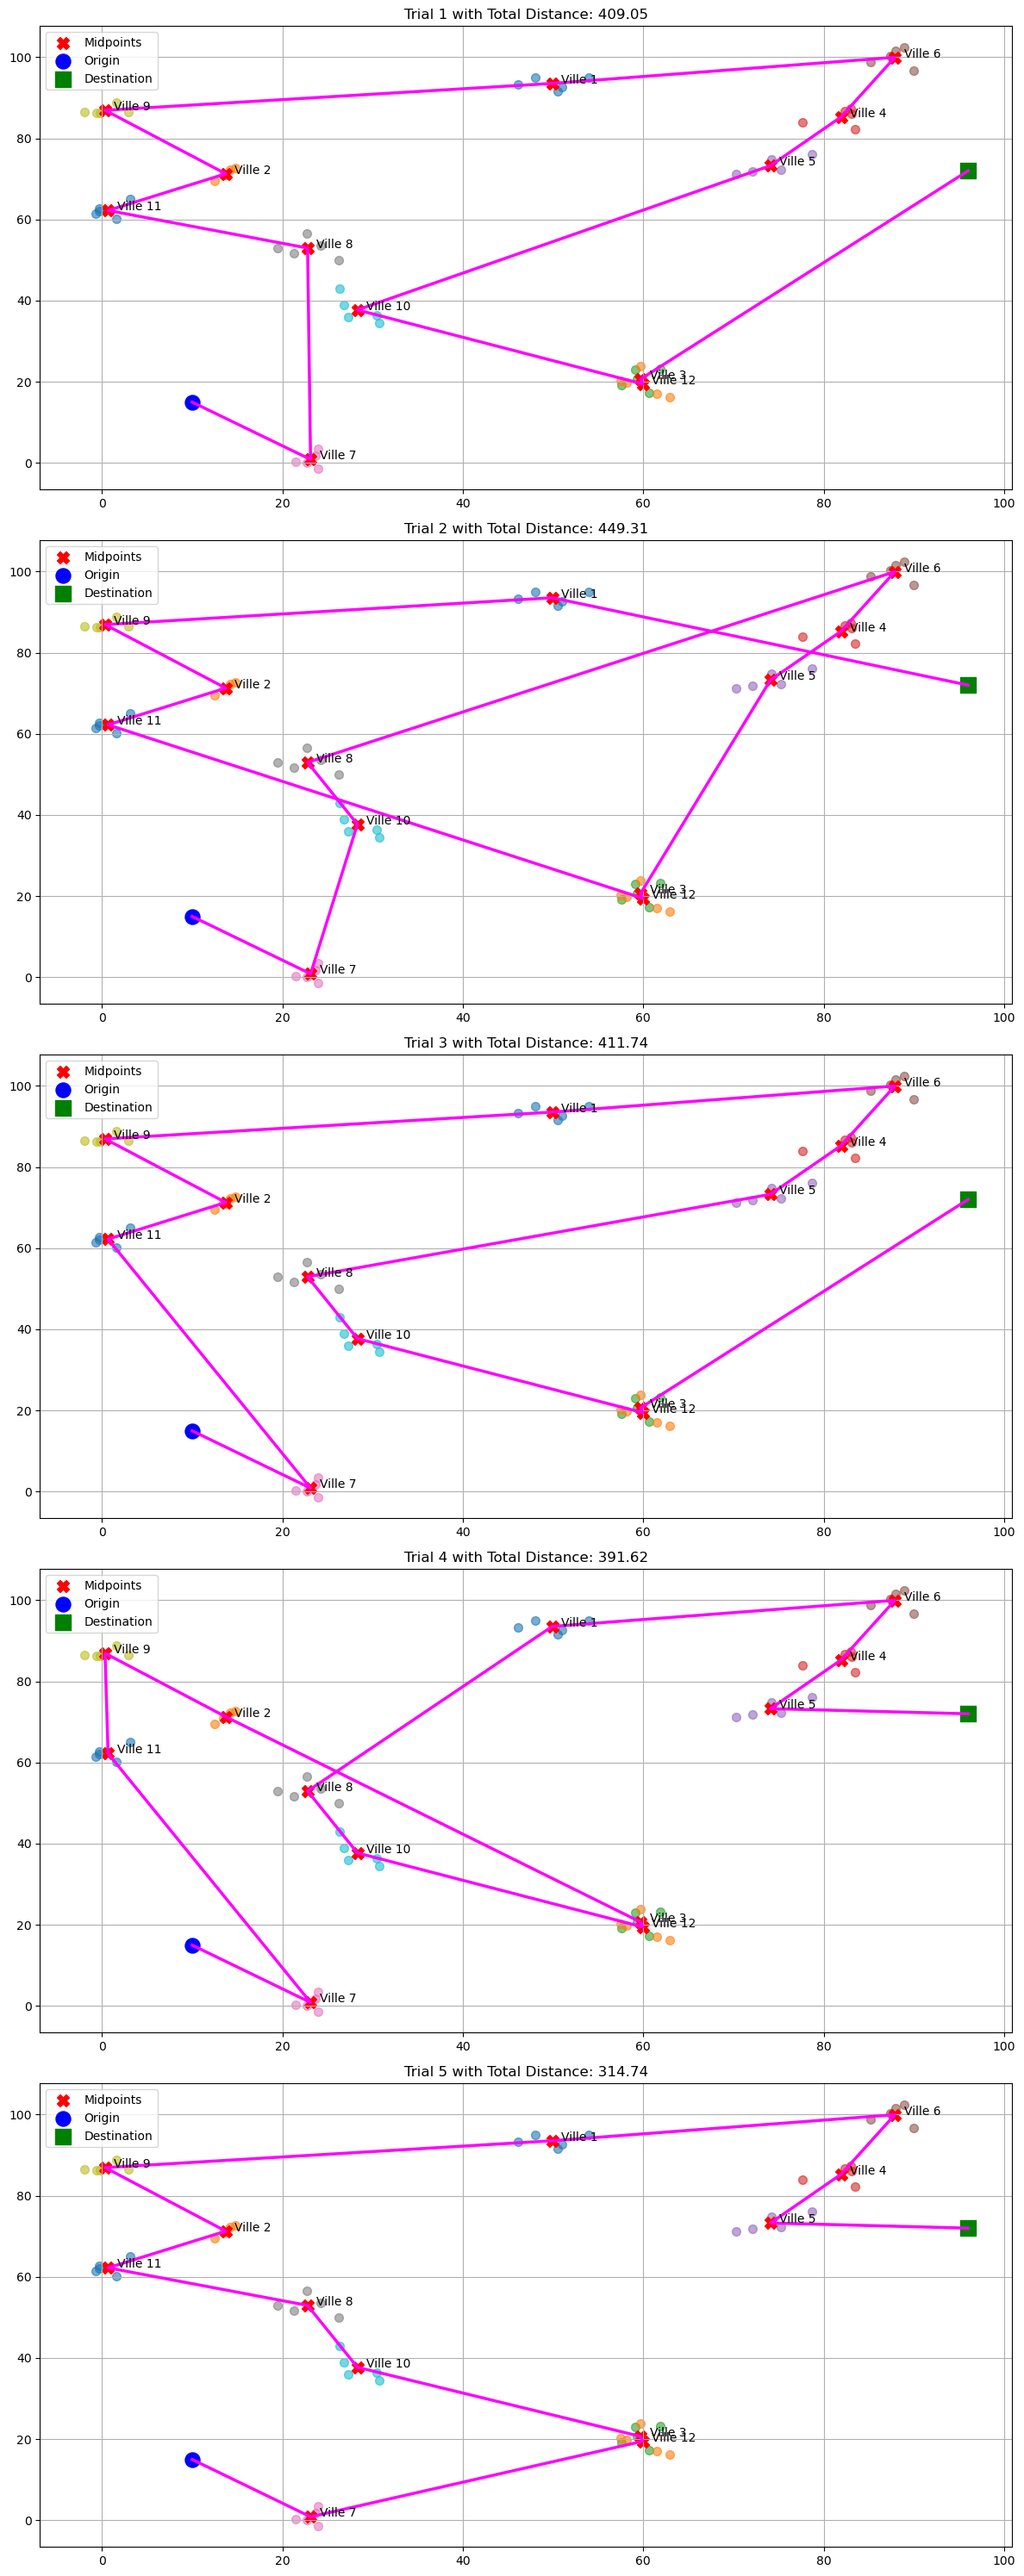

In [32]:
# Affichage des résultats des 5 executions de l'algorithme de Hill Climbing

fig, axes = plt.subplots(5, 1, figsize=(12, 30))

for idx, (result_path, result_distance) in enumerate(results):
    ax = axes[idx]
    for cluster in clusters:
        ax.scatter(cluster[:, 0], cluster[:, 1], s=50, alpha=0.6)
        
    # Plot des chemins
    path = [origin] + result_path + [destination]
    ax.plot(*zip(*path), linestyle='-', color='magenta', linewidth=2.5)
    
    # Annotatation des villes
    for city_idx, point in enumerate(midpoints, 1):
        ax.annotate(f"Ville {city_idx}", (point[0] + 1, point[1]), fontsize=10)
    
    # 
    ax.scatter(*zip(*midpoints), c='red', s=100, marker='X', label='Midpoints')
    ax.scatter(*origin, c='blue', s=150, marker='o', label='Origin')
    ax.scatter(*destination, c='green', s=150, marker='s', label='Destination')
    ax.set_title(f"Trial {idx + 1} with Total Distance: {result_distance:.2f}")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()
